# Métodos estatísticos para análise de ações

## Bibliotecas importadas

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr 
import pandas_datareader.data as web
import datetime 
import matplotlib.pyplot as plt 

plt.style.use('seaborn')

Definição do intervalo de tempo para análise de dados:

In [4]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2019, 1, 1)

A amostra de dados será composta pelos preços de ações da IBM desde 01 de janeiro de 2015 até 01 de janeiro de 2019. Os dados serão obtidos da API yahoo finance.

In [5]:
ibm = web.DataReader('IBM', 'yahoo', start, end)

In [6]:
ibm.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,106.118546,102.772469,105.066925,102.839386,3997184.0,87.719414
2018-12-26,106.491394,101.281075,103.250481,106.491394,6951507.0,90.834496
2018-12-27,108.776291,104.655830,105.152962,108.776291,6323698.0,92.783447
2018-12-28,109.751434,107.552582,109.196938,108.059273,5352905.0,92.171852
2018-12-31,109.321220,107.476097,108.346077,108.671127,5212009.0,92.693741


In [7]:
ibm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,156.128113,153.919693,154.216064,154.933075,5779673.0,113.538879
2015-01-05,154.177826,152.189301,154.177826,152.495224,5104898.0,111.752350
2015-01-06,152.925430,148.346085,152.648178,149.206497,6429448.0,109.342300
2015-01-07,150.286804,147.256210,150.286804,148.231354,4918083.0,108.627678
2015-01-08,152.045883,148.709366,149.369019,151.453156,4431693.0,110.988670


Estatísticas básicas:

In [21]:
print(f"Média: {ibm['Close'].mean():.4f}")
print(f"Mediana: {ibm['Close'].median():.4f}")
print(f"Moda: {ibm['Close'].mode().loc[0]:.4f}")

Média: 145.1695
Mediana: 145.7983
Moda: 140.0382


Criação do histrograma da distribuição retornos simples

In [23]:
ibm_returns = ibm['Close'].pct_change()
ibm_returns.head()

Date
2015-01-02         NaN
2015-01-05   -0.015735
2015-01-06   -0.021566
2015-01-07   -0.006536
2015-01-08    0.021735
Name: Close, dtype: float64

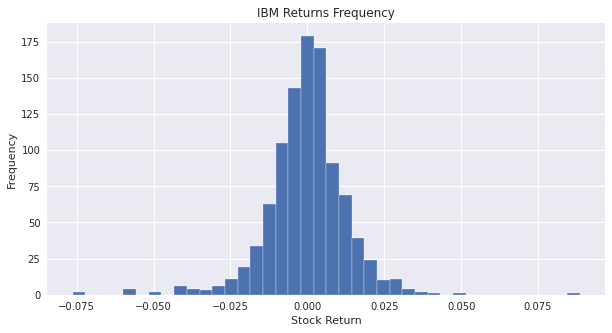

In [33]:
N = ibm_returns.shape[0]
k = int(np.round(1 + 3.3222 * np.log10(N)))

ax = ibm_returns.hist(bins=40, edgecolor='white', figsize=(10,5))
ax.set_xlabel('Stock Return')
ax.set_ylabel('Frequency')
ax.set_title('IBM Returns Frequency')
plt.show()


Histograma dos retornos logarítmicos

In [35]:
ibm_log_returns = np.log(ibm['Close'] / ibm['Close'].shift(1))

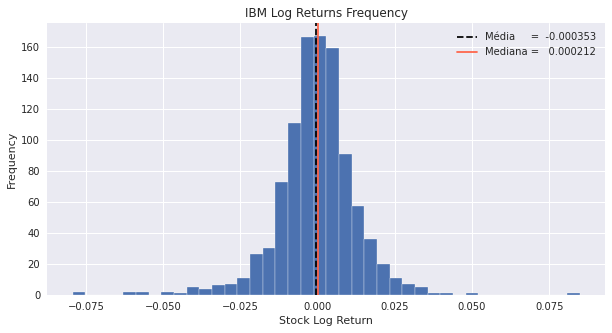

In [70]:
median = ibm_log_returns.median()
mean = ibm_log_returns.mean()

ax = ibm_log_returns.hist(bins=40, edgecolor='white', figsize=(10,5))
ax.axvline(mean, color='black',  linestyle='dashed', label=f'Média     = {mean:>10.6f}')
ax.axvline(median, color='tomato', label=f'Mediana = {median:>10.6f}')

ax.set_xlabel('Stock Log Return')
ax.set_ylabel('Frequency')
ax.set_title('IBM Log Returns Frequency')
plt.legend()
plt.show()


Note-se que a média e a media dos retornos logarítmicos são levemente diferentes. De fato, a distribuição desses dados apresenta uma assimetria negativa igual a: 

In [71]:
ibm_log_returns.skew()

-0.6582895096911845

Além da assimetria, calculada acima, outra importante medida descritiva dos dados é a curtose. Para os retornos logarítmicos, a curtose é igual a:

In [72]:
ibm_log_returns.kurtosis()

6.257142458760562